<a href="https://colab.research.google.com/github/khb6/sub_pj_pro/blob/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


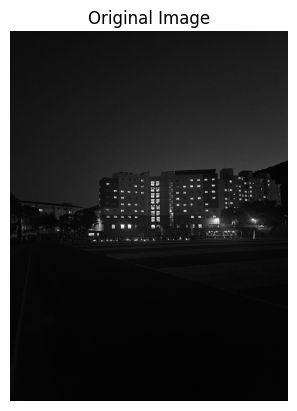

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/pj1/영상이미지/Images/학교 운동장.jpg', cv2.IMREAD_GRAYSCALE)  # 흑백으로 변환
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

4장의 영상의 화질 향상 기법을 참고하여
학교 운동장 이미지를 여러 가지 기법을 사용한 후 비교해 보았습니다

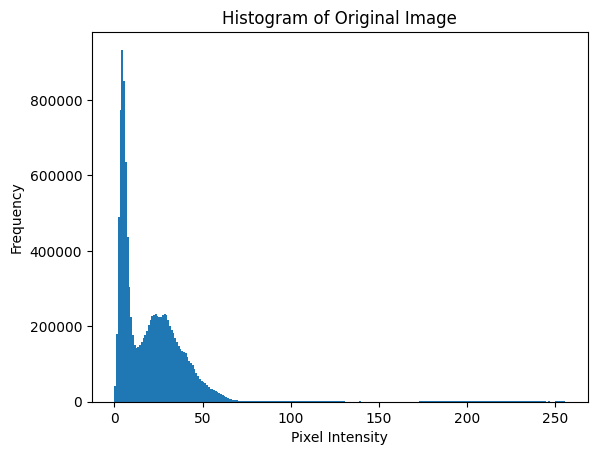

In [ ]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(img, "Histogram of Original Image")


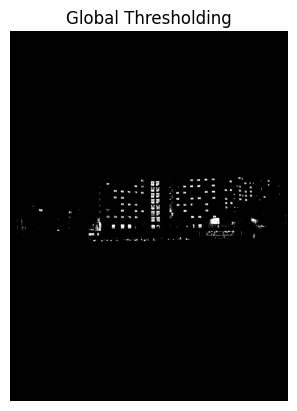

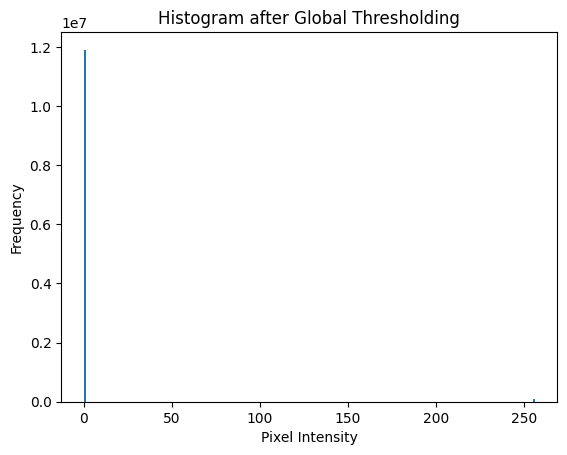

In [ ]:
# 전역 임계값 적용
_, global_thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()

plot_histogram(global_thresh, "Histogram after Global Thresholding")


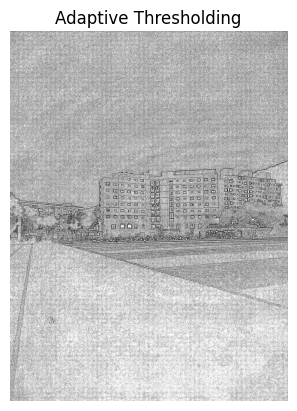

In [ ]:
# 적응적 임계값 적용
adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


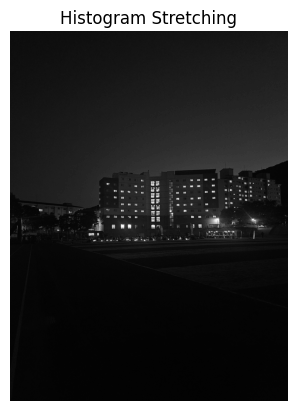

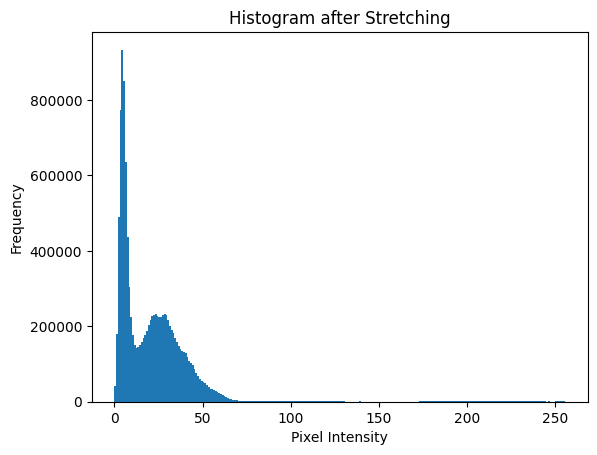

In [ ]:
def histogram_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')
    return stretched

stretched_img = histogram_stretching(img)

plt.imshow(stretched_img, cmap='gray')
plt.title('Histogram Stretching')
plt.axis('off')
plt.show()

plot_histogram(stretched_img, "Histogram after Stretching")


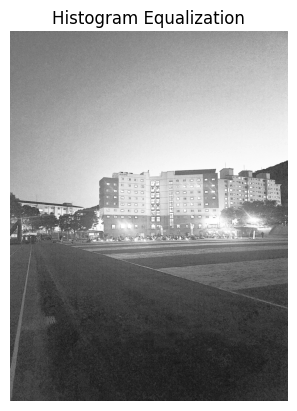

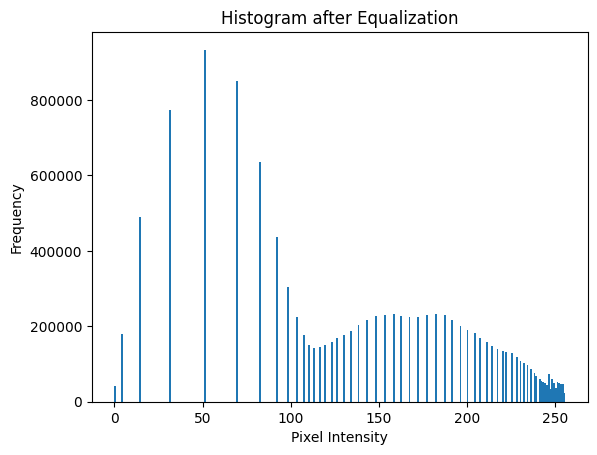

In [ ]:
equalized_img = cv2.equalizeHist(img)

plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

plot_histogram(equalized_img, "Histogram after Equalization")


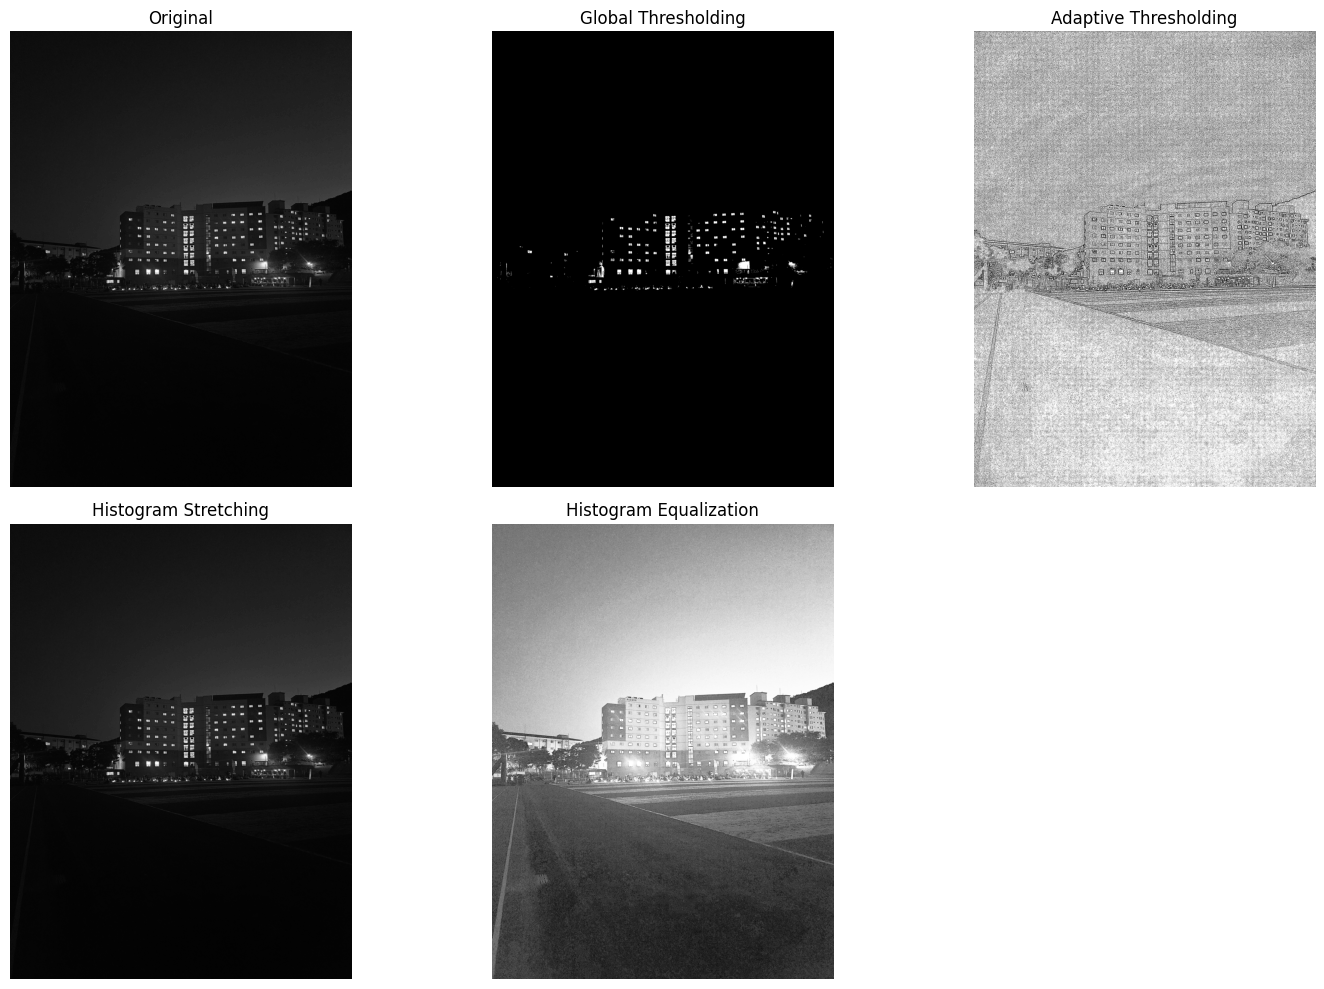

In [ ]:
# 결과를 비교하는 함수
def compare_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

compare_images(
    [img, global_thresh, adaptive_thresh, stretched_img, equalized_img],
    ['Original', 'Global Thresholding', 'Adaptive Thresholding',
     'Histogram Stretching', 'Histogram Equalization']
)
